In [460]:
import re
import datetime
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
def store_pickles(filename, to_store):
    with open(filename, 'w') as f:
        pickle.dump(to_store, f)
        
def eat_pickles(filename):
    with open(filename, 'r') as f:
        return pickle.load(f)

In [211]:
df = pd.read_csv('moviedata2015_a.csv', names=['BOM_url', 'Title', 'Domestic_Total_Gross', \
                                             'Release_Date', 'UK_Total_Gross', 'Actors', 'Country', 'British'],)

In [212]:
df_2 = df[['Title', 'Domestic_Total_Gross', 'UK_Total_Gross', 'Actors', 'Country', 'British']]

In [213]:
df_no_UK_ = df_2[df_2["Country"] != 'UK']

In [284]:
test_list = []
 
for country in df_no_UK['Country'].values:
    try:
        test_list.append(country.split(','))
    except:
        test_list.append([])

In [285]:
boolean_val = []

for country in test_list:
    if 'USA' in country:
        boolean_val.append(True)
    else:
        boolean_val.append(False)

In [ ]:
df_US = df_no_UK[boolean_val]  

In [294]:
df_US = df_US[df_US['UK_Total_Gross'] > 250000]

In [443]:
df_US

,Title,Domestic_Total_Gross,UK_Total_Gross,Actors,Country,British
0,Mr. Peabody & Sherman,111506430,22511139,", , (Voice), Allison Janney* , Stephen Colber...",USA,0
2,Doogal,7417319,10957566,", , (Voice), Jim Broadbent*, Bill Nighy* , Ia...","USA, UK, France",0
3,Legend of the Guardians: The Owls of Ga'Hoole,55675313,5282850,", , (Voice), Ryan Kwanten , Richard Roxburgh ...","USA, Australia",0
4,Wreck-It Ralph,189422889,36182022,", , (Voice), Sarah Silverman , John C. Reilly...",USA,0
6,Monsters University,268492764,47166338,", , Alfred Molina*, Billy Crystal, Tyler Labi...",USA,1
7,Cloudy with a Chance of Meatballs 2,119793567,20100028,", , Andy Samberg*, Neil Patrick Harris*, Will...",USA,0
8,Scary Movie 3,110003217,16607287,", , Anna Faris, Leslie Nielsen, Simon Rex, Ed...","USA, Canada",0
9,Shrek Forever After,238736787,51056068,", , Antonio Banderas, Cameron Diaz, (Voice), ...",USA,0
10,Shrek the Third,322719944,78167259,", , Antonio Banderas, Cameron Diaz, Amy Poehl...",USA,0
12,The Boxtrolls,50837305,13816528,", , Ben Kingsley, (Voice), Toni Collette, Tra...",USA,1


In [371]:
#df_US = df_US.drop(1917)
#df_US = df_US.drop(164)
#df_US = df_US.drop(472)
#df_US = df_US.drop(818)
#df_US = df_US.drop(945)

In [360]:
#df_non_avataar = df_US.drop(1913)
#df_US[df_US['Domestic_Total_Gross'].isnull()]
#missing_gross = [26213520, 0, 165982915, 17113323, 31338504, 128002372, 0, 0, 22348241, 18562800, 64460211, \
#                37862911, 53659191, 42340598, 121245304, 17266000, 13092000, 187178992, 250863268, 47248274, \
#                47842467, 10219501, 79348835]
#indices = df_US[df_US['Domestic_Total_Gross'].isnull()].index

In [361]:
#for i in range(len(indices)):
#    df_US.loc[indices[i], 'Domestic_Total_Gross'] = missing_gross[i]

In [446]:
df_test = df_US

In [346]:
#df_US.loc[20, 'Domestic_Total_Gross'] = 222404450
#df_US.loc[26, 'Domestic_Total_Gross'] = 83320932
#df_US.loc[79, 'Domestic_Total_Gross'] = 35916045
#df_US.loc[237, 'Domestic_Total_Gross'] = 161756387
#df_US.loc[46, 'Domestic_Total_Gross'] = 83320932
#df_US.loc[79, 'Domestic_Total_Gross']

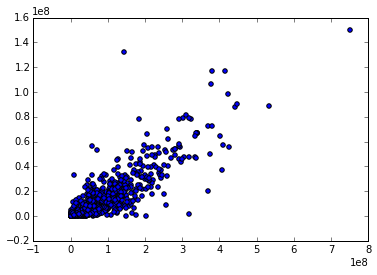

In [486]:
plt.scatter(US_df_final['Domestic_Total_Gross'], US_df_final['UK_Total_Gross'])

In [465]:
smf.ols("np.log(UK_Total_Gross) ~ np.log(Domestic_Total_Gross) + British", df_US).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(UK_Total_Gross)   R-squared:                       0.546
Model:                                OLS   Adj. R-squared:                  0.545
Method:                     Least Squares   F-statistic:                     780.0
Date:                    Wed, 22 Apr 2015   Prob (F-statistic):          3.90e-223
Time:                            20:07:37   Log-Likelihood:                -1724.5
No. Observations:                    1300   AIC:                             3455.
Df Residuals:                        1297   BIC:                             3471.
Df Model:                               2                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        2.7503      0.323      8.517      0.000         2.117     3.384
np.log(Domestic_Total_Gross)     0.7159      0.018     38.723      0.000         0.680     0.752
British                          0.3080      0.053      5.786      0.000         0.204     0.412
==============================================================================
Omnibus:                       63.183   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.116
Skew:                          -0.234   Prob(JB):                     6.26e-36
Kurtosis:                       4.666   Cond. No.                         224.
==============================================================================
"""

In [456]:
genre_df.columns = ['Budget', 'Genre', 'Title']

In [458]:
US_df = df_test.merge(genre_df)

In [459]:
US_df

,Title,Domestic_Total_Gross,UK_Total_Gross,Actors,Country,British,Budget,Genre
0,Mr. Peabody & Sherman,111506430,22511139,", , (Voice), Allison Janney* , Stephen Colber...",USA,0,145000000,Animation
1,Doogal,7417319,10957566,", , (Voice), Jim Broadbent*, Bill Nighy* , Ia...","USA, UK, France",0,NaN,Animation
2,Legend of the Guardians: The Owls of Ga'Hoole,55675313,5282850,", , (Voice), Ryan Kwanten , Richard Roxburgh ...","USA, Australia",0,80000000,Animation
3,Wreck-It Ralph,189422889,36182022,", , (Voice), Sarah Silverman , John C. Reilly...",USA,0,165000000,Animation
4,Monsters University,268492764,47166338,", , Alfred Molina*, Billy Crystal, Tyler Labi...",USA,1,NaN,Animation
5,Cloudy with a Chance of Meatballs 2,119793567,20100028,", , Andy Samberg*, Neil Patrick Harris*, Will...",USA,0,78000000,Animation
6,Scary Movie 3,110003217,16607287,", , Anna Faris, Leslie Nielsen, Simon Rex, Ed...","USA, Canada",0,48000000,Horror Comedy
7,Shrek Forever After,238736787,51056068,", , Antonio Banderas, Cameron Diaz, (Voice), ...",USA,0,165000000,Animation
8,Shrek the Third,322719944,78167259,", , Antonio Banderas, Cameron Diaz, Amy Poehl...",USA,0,160000000,Animation
9,The Boxtrolls,50837305,13816528,", , Ben Kingsley, (Voice), Toni Collette, Tra...",USA,1,60000000,Animation


In [484]:
smf.ols("np.log(UK_Total_Gross) ~ np.log(Domestic_Total_Gross) + Genres + Budget + British", US_df_final).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(UK_Total_Gross)   R-squared:                       0.997
Model:                                OLS   Adj. R-squared:                  0.997
Method:                     Least Squares   F-statistic:                 1.969e+04
Date:                    Wed, 22 Apr 2015   Prob (F-statistic):               0.00
Time:                            21:16:42   Log-Likelihood:                -1185.7
No. Observations:                    1010   AIC:                             2411.
Df Residuals:                         990   BIC:                             2510.
Df Model:                              20                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       -0.3827      0.535     -0.716      0.474        -1.432     0.666
Genres[T.Adventure]              0.1873      0.120      1.567      0.117        -0.047     0.422
Genres[T.Animation]              0.3402      0.107      3.166      0.002         0.129     0.551
Genres[T.Comedy]                 0.1180      0.082      1.435      0.152        -0.043     0.279
Genres[T.Concert]                0.8423      0.565      1.492      0.136        -0.266     1.950
Genres[T.Crime]                  0.5672      0.461      1.231      0.219        -0.337     1.471
Genres[T.Documentary]           -0.0640      0.332     -0.193      0.847        -0.716     0.588
Genres[T.Drama]                  0.0682      0.092      0.745      0.456        -0.111     0.248
Genres[T.Epic]                   0.5795      0.564      1.027      0.304        -0.527     1.686
Genres[T.Family]                 0.1728      0.330      0.524      0.600        -0.474     0.820
Genres[T.Fantasy]                0.0488      0.180      0.271      0.787        -0.305     0.402
Genres[T.Horror]                 0.2126      0.108      1.977      0.048         0.002     0.424
Genres[T.IMAX]                5.637e-17    1.5e-16      0.376      0.707     -2.38e-16  3.51e-16
Genres[T.Romance]                0.4377      0.175      2.506      0.012         0.095     0.780
Genres[T.Sci-Fi]                 0.0754      0.305      0.247      0.805        -0.522     0.673
Genres[T.Thriller]               0.0749      0.106      0.705      0.481        -0.134     0.283
Genres[T.War]                    0.0657      0.304      0.216      0.829        -0.532     0.663
Genres[T.Western]                0.2349      0.359      0.655      0.513        -0.469     0.938
np.log(Domestic_Total_Gross)     0.8755      0.031     28.254      0.000         0.815     0.936
Budget                        3.463e-09   7.18e-10      4.827      0.000      2.06e-09  4.87e-09
British                          0.2299      0.056      4.075      0.000         0.119     0.341
==============================================================================
Omnibus:                      136.807   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.793
Skew:                          -0.744   Prob(JB):                     1.48e-72
Kurtosis:                       5.376   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is  -5.76. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [485]:
US_df_final.to_csv('US_final.csv')

In [472]:
title_genre = eat_pickles('title_genre.pkl')

In [473]:
df_title_genre = pd.DataFrame(title_genre)

In [476]:
#df_title_genre
del US_df['Genre']

In [479]:
US_df_final = US_df.merge(df_title_genre)